# Resume Classification

# Business objective:

The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention.

In [1]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
pip install docx2txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
pip install textract

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


Defaulting to user installation because normal site-packages is not writeable


# 1. Import Library

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'spacy'

In [ ]:
os.listdir('Resumes')

# 2. Exctract the Text from Dataset

In [3]:
file_path1 = []
category1  = []
directory1 = 'D:\Project 2 Resume Classification\Resumes\Peoplesoft resumes'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Project 2 Resume Classification\\Resumes\\Peoplesoft resumes'

In [4]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

NameError: name 'pd' is not defined

In [8]:
file_path2 = []
category2  = []
directory2 = 'D:\Project 2 Resume Classification\Resumes\React'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [9]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
8,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer


In [10]:
file_path3 = []
category3  = []
directory3 = 'D:\Project 2 Resume Classification\Resumes\SQL Developer Lightning insight'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [11]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer


In [12]:
file_path4 = []
category4  = []
directory4 = 'D:\Project 2 Resume Classification\Resumes\workday resumes'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [13]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,G Himaja\n\n ...,Workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
5,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
6,Workday HCM Techno functional Consultant ...,Workday
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
8,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday


# 3. Create a DataFrame

In [14]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN


In [15]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


# 3.1 Merge all Unnecessary column in One Column

In [16]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [17]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

# 3.2 Final Dataset

In [18]:
resume_data.head(50)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [19]:
resume_data["Raw_Details"][5]

'Hari Narayana \t\t              \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, implementation, Data conversion, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\n\n\nBachelor of Technology (B-Tech) from JNTU-K\n\n\t   Currently Working as a People Soft Consultant in Randstad, Hyderabad\n\n\n\n\n\nRELEVANT EXPERIENCE\n\nPeopleSoft Consultant – Randstad

# 3.3 Save new CSV File

In [20]:
resume_data.to_csv('Raw_Resume.csv', index=False)

# 4. Data Understanding

In [21]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [22]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
41,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
42,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
43,Workday,G Himaja\n\n ...
44,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
45,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
46,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
47,Workday,Workday HCM Techno functional Consultant ...
48,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
49,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
50,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...


In [23]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

# 4.1 Number of Words in each Resume

In [24]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,Classification: Internal\n\nClassification: In...,558
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
4,PeopleSoft Administration\n\n \n\nVivekanand S...,2585


# 4.2 Number of Characters

In [25]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,Classification: Internal\n\nClassification: In...,4917
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
4,PeopleSoft Administration\n\n \n\nVivekanand S...,16112


# 4.3 Number of Stopwords

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,Classification: Internal\n\nClassification: In...,114
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
4,PeopleSoft Administration\n\n \n\nVivekanand S...,520


# 4.4 Number of Numerics 

In [27]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,Classification: Internal\n\nClassification: In...,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
4,PeopleSoft Administration\n\n \n\nVivekanand S...,17


In [28]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8


# 5. Text Pre-Processing

# 5.1 Using Regular Expression

In [29]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [30]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

# 5.2 Clean Text from Resume

In [31]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...


# 5.3 Save the Clean Data in new CSV File

In [32]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [33]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [34]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [35]:
resume_data.Resume_Details[5]

'hari narayana professional summary years experience peoplesoft application enhancement implementation data conversion support upgrade projects well experienced people tools functional knowledge hcm fscm applications skill people tools application designer application engine people code application packages peoplesoft application fscm hcm applications fscm modules procurement billing hcm modules recruiting performance management waf benefits interfaces component interface file layout languages database oracle sql server operating system windows unix education bachelor technology tech jntu currently working people soft consultant randstad hyderabad relevant experience peoplesoft consultant randstad hyderabad andhra pradesh india june till date project randstad enhancements client randstad staffing responsibilities analyze requirement documents understand customer business requirement provide technical approach fdd assign customize system applications designed many objects scratch write 

# 6. Named Entity Recognition (NER)

In [36]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('hcm', 94), ('support', 94), ('like', 94), ('developer', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('professional', 69)]


In [37]:
!python -m spacy download en_core_web_lg

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB 1.3 MB/s eta 0:07:40
     ---------------------------------------- 0.1/587.7 MB 1.7 MB/s eta 0:05:45
     ---------------------------------------- 0.4/587.7 MB 2.9 MB/s eta 0:03:25
     ---------------------------------------- 0.6/587.7 MB 3.6 MB/s eta 0:02:42
     ---------------------------------------- 0.9/587.7 MB 4.1 MB/s eta 0:02:23
     ---------------------------------------- 1.3/587.7 MB 5.0 MB/s eta 0:01:58
     ---------------------------------------- 1.6/587.7 MB 5.1 MB/s eta 0:01:55
     ---------------------------------------- 1.9/587.7 MB 5.4 MB/s eta 0:01:49
     ---------------------------------------- 2.3/587.7 MB 5.6 MB/s eta 0:01:44
     ---------------------------------------- 2.7/587.7 MB 6.0 MB/s eta 0:01:37
     ---------------------------------------- 3.0

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# 7. Parts Of Speech (POS) Tagging

In [38]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [39]:
for token in doc_block[:30]:
    print(token,token.pos_) 

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


# 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [40]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

# 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [41]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,298
1,using,243
2,application,207
3,workday,193
4,reports,170
5,data,170
6,project,167
7,business,158
8,web,140
9,react,132


# 7.3 Visualizing the Result of Top Nouns and Verbs most Frequently

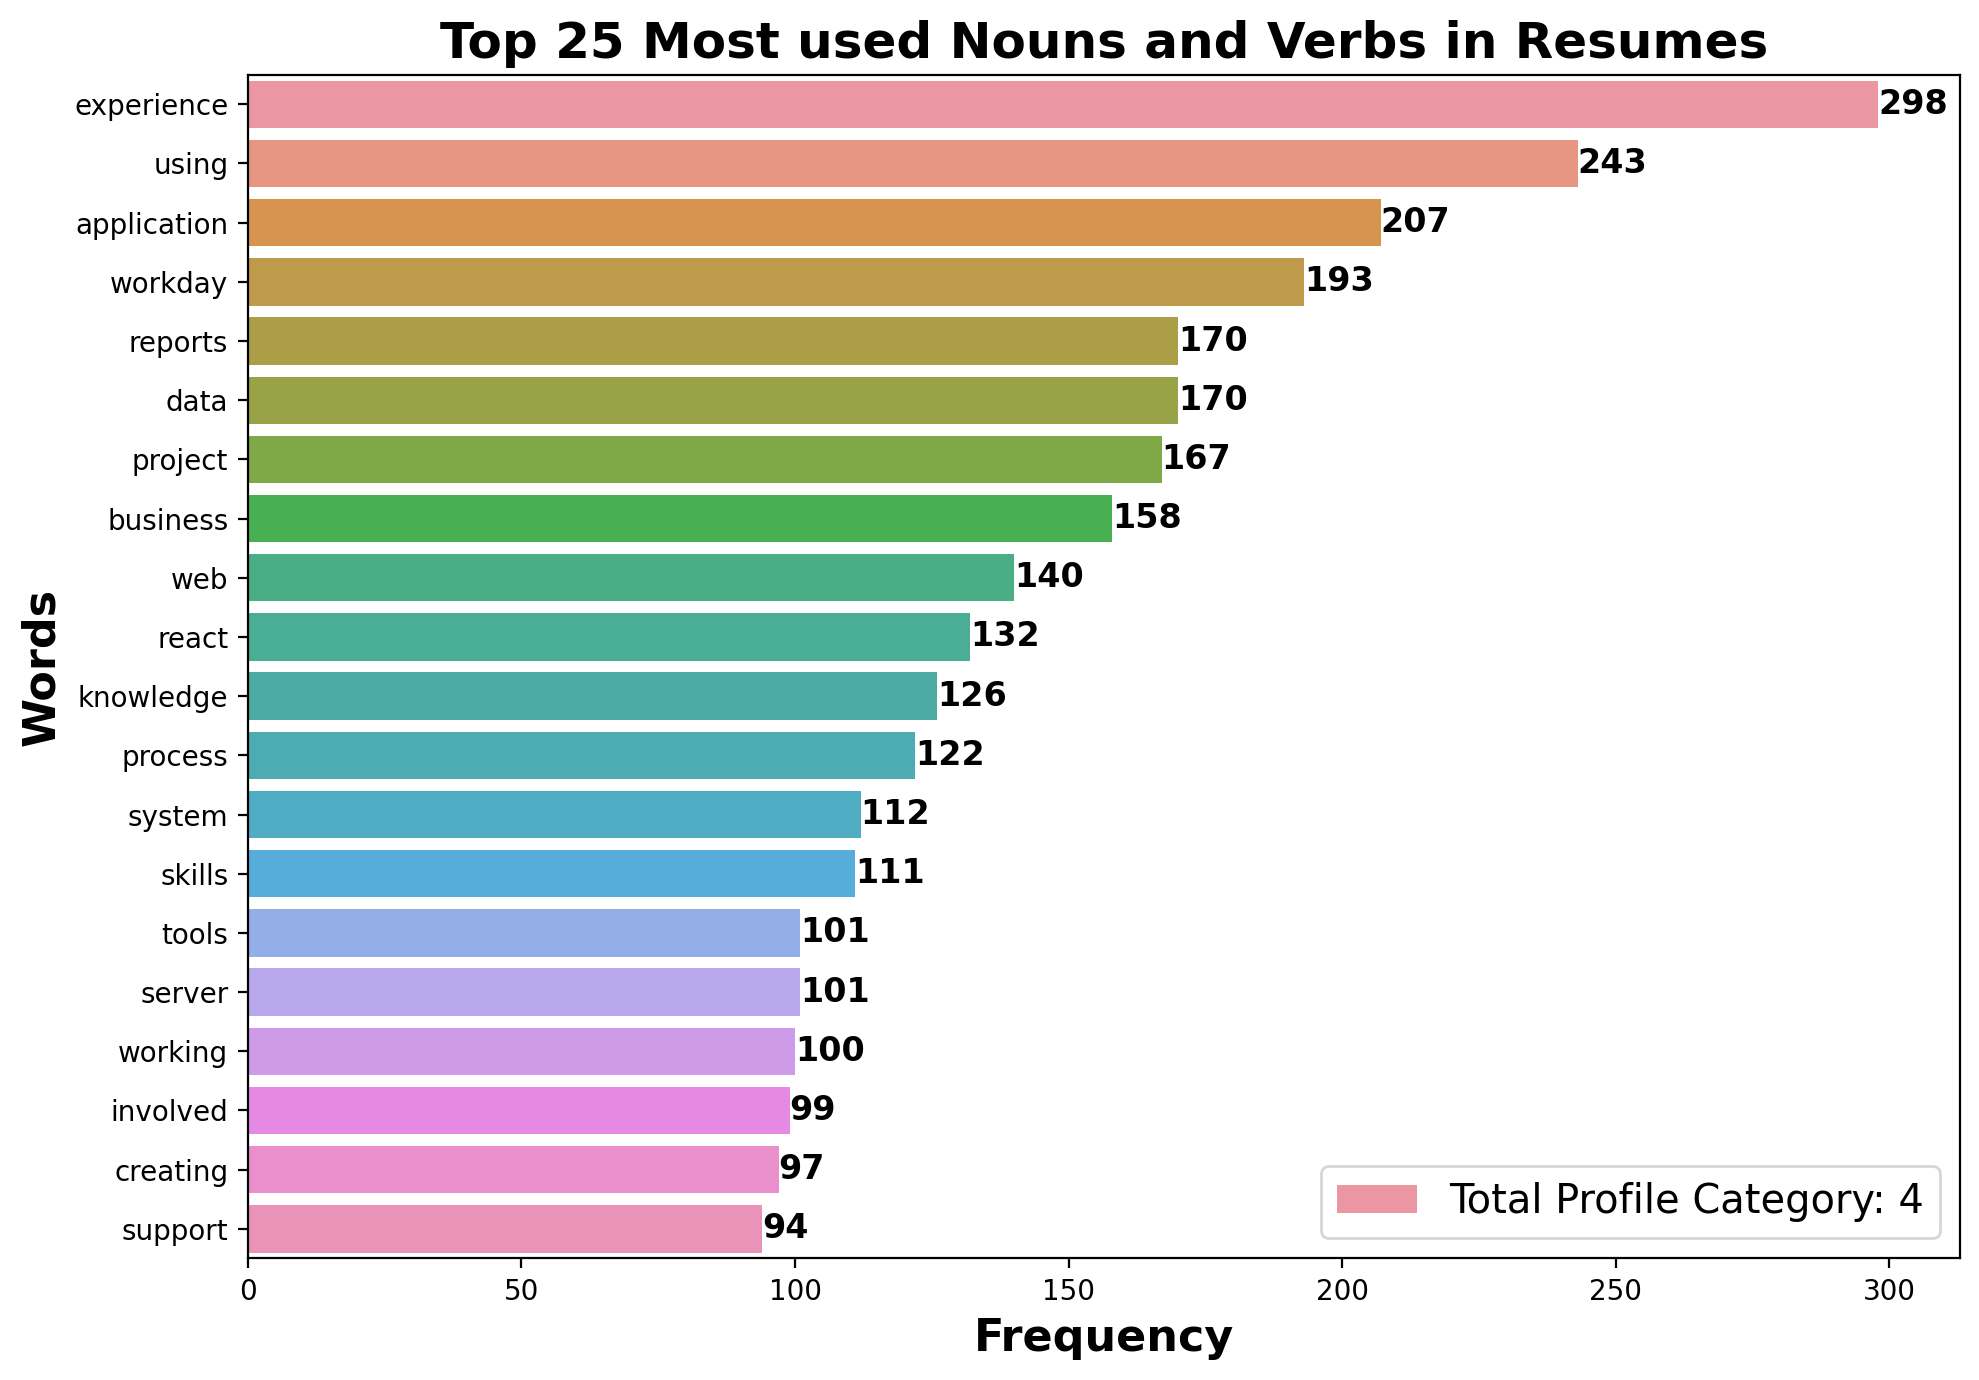

In [42]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x=wd_df['Count'].head(20), y=wd_df.Words.head(20), data=wd_df, ax=axe,
                 label='Total Profile Category: {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16, fontweight='bold')
axe.set_ylabel('Words', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize=18, fontweight='bold')
rcParams = {'xtick.labelsize': '14', 'ytick.labelsize': '14', 'axes.labelsize': '16'}

for i in ax.containers:
    ax.bar_label(i, color='black', fontweight='bold', fontsize=12)

pylab.rcParams.update(rcParams)
fig.tight_layout()

# Save the image as a PNG file
plt.savefig('top_words_resumes.png')

# Display the plot
plt.show()

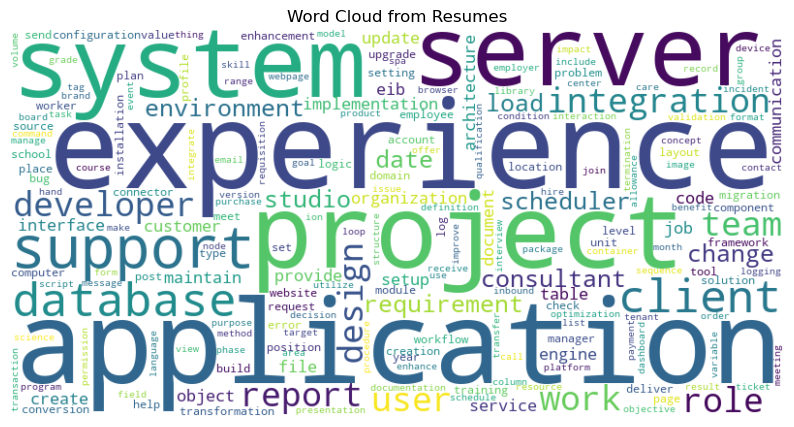

In [43]:
#Combine all text data into a single string
all_text = " ".join(cat for cat in wd_df.Words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Resumes')
plt.show()